# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО:

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [34]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [3]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [4]:
np.array(mnist.data.iloc[0]).reshape(28,28) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [5]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)

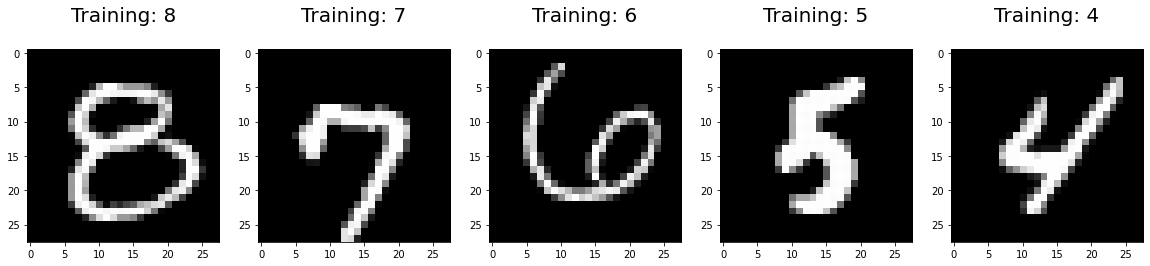

In [7]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    image = np.array(X_train[0:5].iloc[index]).reshape(28, 28)
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [8]:
%%time
y_pred = []
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
models = [LogisticRegression(random_state=42), Ridge(random_state=42), Lasso(random_state=42)]
for i in range(3):
    model = models[i]
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test))

CPU times: user 37.4 s, sys: 947 ms, total: 38.4 s
Wall time: 20.3 s


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

**Подберем оптимальные гиперпараметры для KNN**

In [10]:
neighbours = np.arange(1, 10).astype('int')
acc = []
for i in neighbours:
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

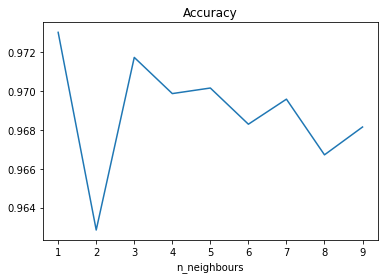

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(neighbours, acc)
plt.xlabel('n_neighbours')
plt.title('Accuracy')
plt.show()

In [12]:
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

**Подберем оптимальные гиперпараметры для случайного леса**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
%%time
max_depth = np.arange(15, 25).astype('int')
acc = []
for i in max_depth:
    model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42).fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))

CPU times: user 8min 2s, sys: 3.47 s, total: 8min 5s
Wall time: 8min 7s


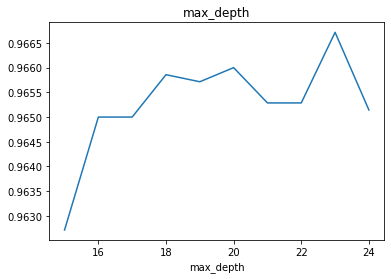

In [36]:
plt.figure(figsize=(6, 4))
plt.plot(max_depth, acc)
plt.xlabel('max_depth')
plt.title('max_depth')
plt.show()

In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=23, random_state=42).fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)

**Бустинг над деревьями**

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
%%time
model = GradientBoostingClassifier(random_state=42, n_estimators=15, max_depth=5, subsample=0.3).fit(X_train, y_train)
y_pred_gbc = model.predict(X_test)

CPU times: user 3min 28s, sys: 1.78 s, total: 3min 30s
Wall time: 3min 32s


При дальнейшем незначительном увеличении параметров время увеличивается очень сильно, тогда как метрика качества меняется незначительно, поэтому больше не буду играться с этими параметрами.

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

В данной задаче метрику accuracy можно использовать только для методов класстеризации, так как методы регрессии (Ridge и Lasso) выдают дробные числа. Несмотря на то, что эти значения близки к истинным и мы можем преобразовать float в int и потом в строку, при округлении этих значений будет появляться большая ошибка (так как берем просто целую часть, то есть получаем другое значение), поэтому метрика качества для моделей Ridge и Lasso будет очень маленькой.

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [49]:
print('LogisticRegression Accuracy:', accuracy_score(y_test, y_pred[0]).round(3))
print('Ridge Accuracy:', accuracy_score(y_test, y_pred[1].astype('int').astype('str')).round(3))
print('Lasso Accuracy:', accuracy_score(y_test, y_pred[2].astype('int').astype('str')).round(3))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn).round(3))
print('RandomForest Accuracy:', accuracy_score(y_test, y_pred_rfc).round(3))
print('GradientBoostingClassifier:', accuracy_score(y_test, y_pred_gbc).round(3))

LogisticRegression Accuracy: 0.92
Ridge Accuracy: 0.269
Lasso Accuracy: 0.252
KNN Accuracy: 0.972
RandomForest Accuracy: 0.967
GradientBoostingClassifier: 0.914


**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [22]:
from sklearn import metrics
conf_matrix1 = metrics.confusion_matrix(y_test, y_pred[0])
print('LogisticRegression')
conf_matrix1

LogisticRegression


array([[660,   0,   2,   0,   1,   8,   6,   2,   4,   0],
       [  0, 781,   3,   5,   1,   3,   0,   2,   4,   1],
       [  2,  12, 600,  12,   8,   2,  15,   6,  15,   2],
       [  1,   5,  18, 693,   1,  15,   2,   7,  10,   8],
       [  1,   0,   5,   1, 564,   3,   6,   3,   5,  23],
       [  4,   4,   5,  30,   7, 562,   8,   1,  29,   8],
       [  6,   2,   7,   0,   9,   6, 643,   2,   2,   0],
       [  0,   1,  17,   1,   6,   1,   0, 678,   2,  18],
       [  7,  11,   8,  23,   3,  19,   6,   5, 602,   9],
       [  3,   6,   2,   7,  16,   3,   0,  20,   9, 654]])

In [24]:
conf_matrix2 = metrics.confusion_matrix(y_test, y_pred_knn)
print('KNN')
conf_matrix2

KNN


array([[681,   0,   1,   0,   0,   0,   0,   0,   1,   0],
       [  0, 795,   2,   0,   1,   1,   0,   0,   0,   1],
       [  1,   8, 653,   0,   1,   1,   1,   6,   2,   1],
       [  0,   2,   7, 735,   0,   5,   0,   4,   3,   4],
       [  1,   4,   1,   0, 590,   0,   1,   3,   1,  10],
       [  3,   2,   0,   6,   1, 640,   6,   0,   0,   0],
       [  3,   1,   0,   0,   2,   1, 670,   0,   0,   0],
       [  0,  13,   4,   0,   2,   0,   0, 700,   0,   5],
       [  3,   9,   5,   9,   2,   6,   3,   4, 649,   3],
       [  3,   4,   0,   8,   7,   0,   0,   9,   0, 689]])

In [25]:
conf_matrix3 = metrics.confusion_matrix(y_test, y_pred_rfc)
print('RandomForestClassifier')
conf_matrix3

RandomForestClassifier


array([[677,   0,   2,   0,   0,   0,   1,   0,   3,   0],
       [  0, 787,   4,   3,   1,   0,   0,   4,   1,   0],
       [  0,   1, 654,   2,   4,   0,   6,   1,   5,   1],
       [  1,   0,  13, 726,   0,   3,   2,   6,   5,   4],
       [  2,   0,   2,   0, 591,   0,   2,   2,   1,  11],
       [  2,   2,   1,  10,   1, 628,   4,   1,   8,   1],
       [  2,   0,   0,   0,   2,   4, 667,   0,   2,   0],
       [  0,   3,  11,   0,   5,   0,   0, 698,   1,   6],
       [  0,   4,   4,  11,   4,   4,   5,   3, 656,   2],
       [  2,   5,   0,   9,   9,   2,   1,   4,   5, 683]])

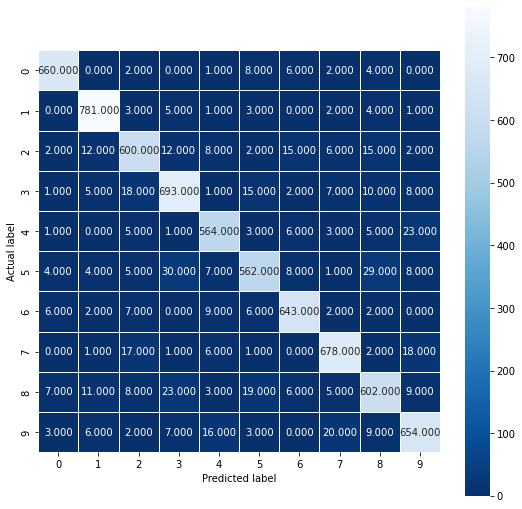

In [26]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

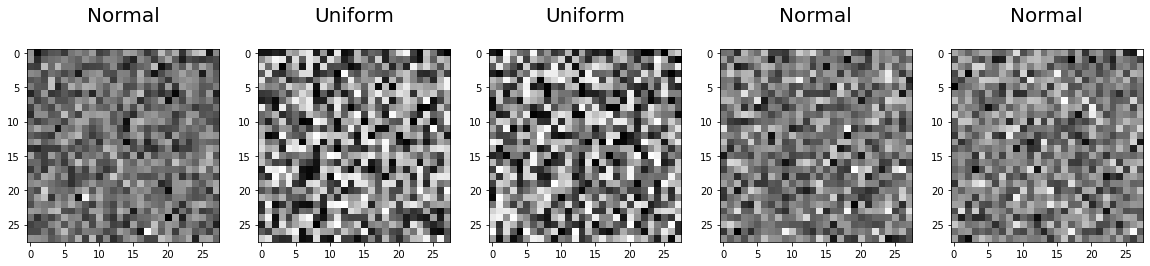

In [27]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [51]:
from sklearn.manifold import TSNE
tsne_representation = TSNE().fit_transform(X_train[:2000])

In [52]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train.values[:2000]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

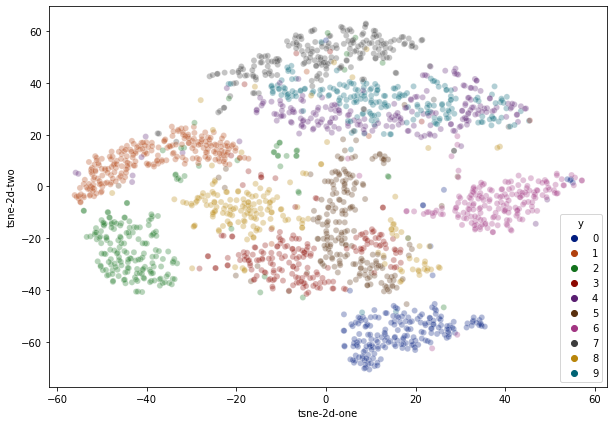

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [54]:
from sklearn.decomposition import PCA
pca_representation = PCA().fit_transform(X_train[:2000])

<AxesSubplot:xlabel='pca-2d-one', ylabel='pca-2d-two'>

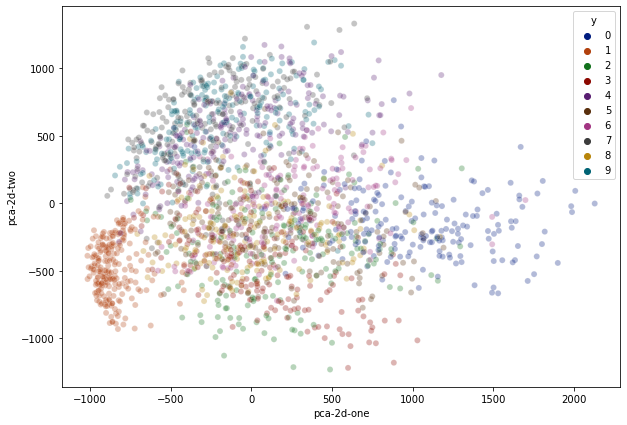

In [55]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train.values[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [56]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,16.864840,-36.430668,8
1,10.665215,60.195354,7
2,28.025030,11.684746,6
3,0.059751,-17.234808,5
4,-7.402191,28.825874,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [86]:
from sklearn.cluster import DBSCAN

dbscan_repr = DBSCAN(eps=6.7, min_samples=55).fit(tsne_repr.iloc[:, :2])

In [87]:
set(dbscan_repr.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

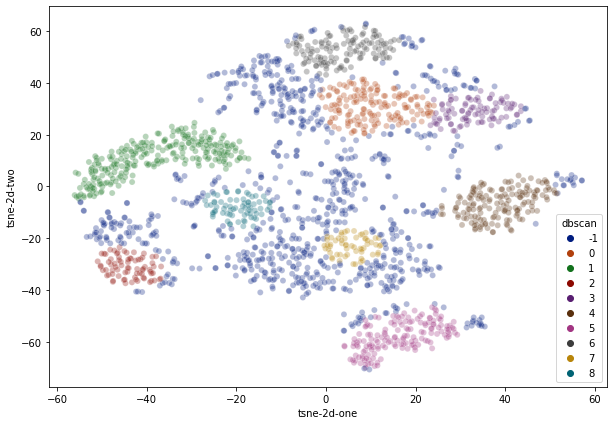

In [90]:
tsne_repr["dbscan"] = dbscan_repr.labels_

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", len(set(dbscan_repr.labels_))),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [ ]:
#ваш код, графики и выводы здесь

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [ ]:
#ваш код здесь

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь